In [1]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../input/munerah-data/debate2019.csv')
data.head()

,Full-Document,Citation,Extract,Abstract,#CharsDocument,#CharsAbstract,#CharsExtract,#WordsDocument,#WordsAbstract,#WordsExtract,AbsCompressionRatio,ExtCompressionRatio,OriginalDebateFileName
0,The Trump Administration has been quietly fund...,Hunt 18 Edward Hunt writes about war and empir...,The Trump Administration has been quietly fund...,This file was produced by the following studen...,5041,147,2106,788,25,326,0.031726,0.413706,Mexico Honduras - Wake 2019.html5
1,The border between the United States and Mexic...,"Monzo et al 17. Lilia D. Monzó, associate pro...",The border between the United States and Mexic...,Imperialism in Mexico is not just a one-off in...,9849,431,4481,1559,71,693,0.045542,0.444516,Mexico Honduras - Wake 2019.html5
2,Today we face a planetary crisis. Environmenta...,Helland and Lindgren 16 Leonardo E. Figueroa H...,Today we face a planetary crisis. Environmenta...,The will of dominion over Mexico is supplanted...,20340,698,8956,2660,109,1200,0.040977,0.451128,Mexico Honduras - Wake 2019.html5
3,"“They talk to me about progress, about ‘achiev...","Lystrup 15. Lauren; University of California, ...","They talk about progress, achievements,’ disea...",Death is not a symptom or consequence of moder...,8774,425,4818,1272,63,701,0.049528,0.551101,Mexico Honduras - Wake 2019.html5
4,The Zapatista movement has garnered much atten...,"Lystrup 15. Lauren, University of California, ...",The Zapatista movement garnered attention in t...,Plan: The United States federal government sho...,6955,161,3522,1023,23,510,0.022483,0.498534,Mexico Honduras - Wake 2019.html5


# Char counts

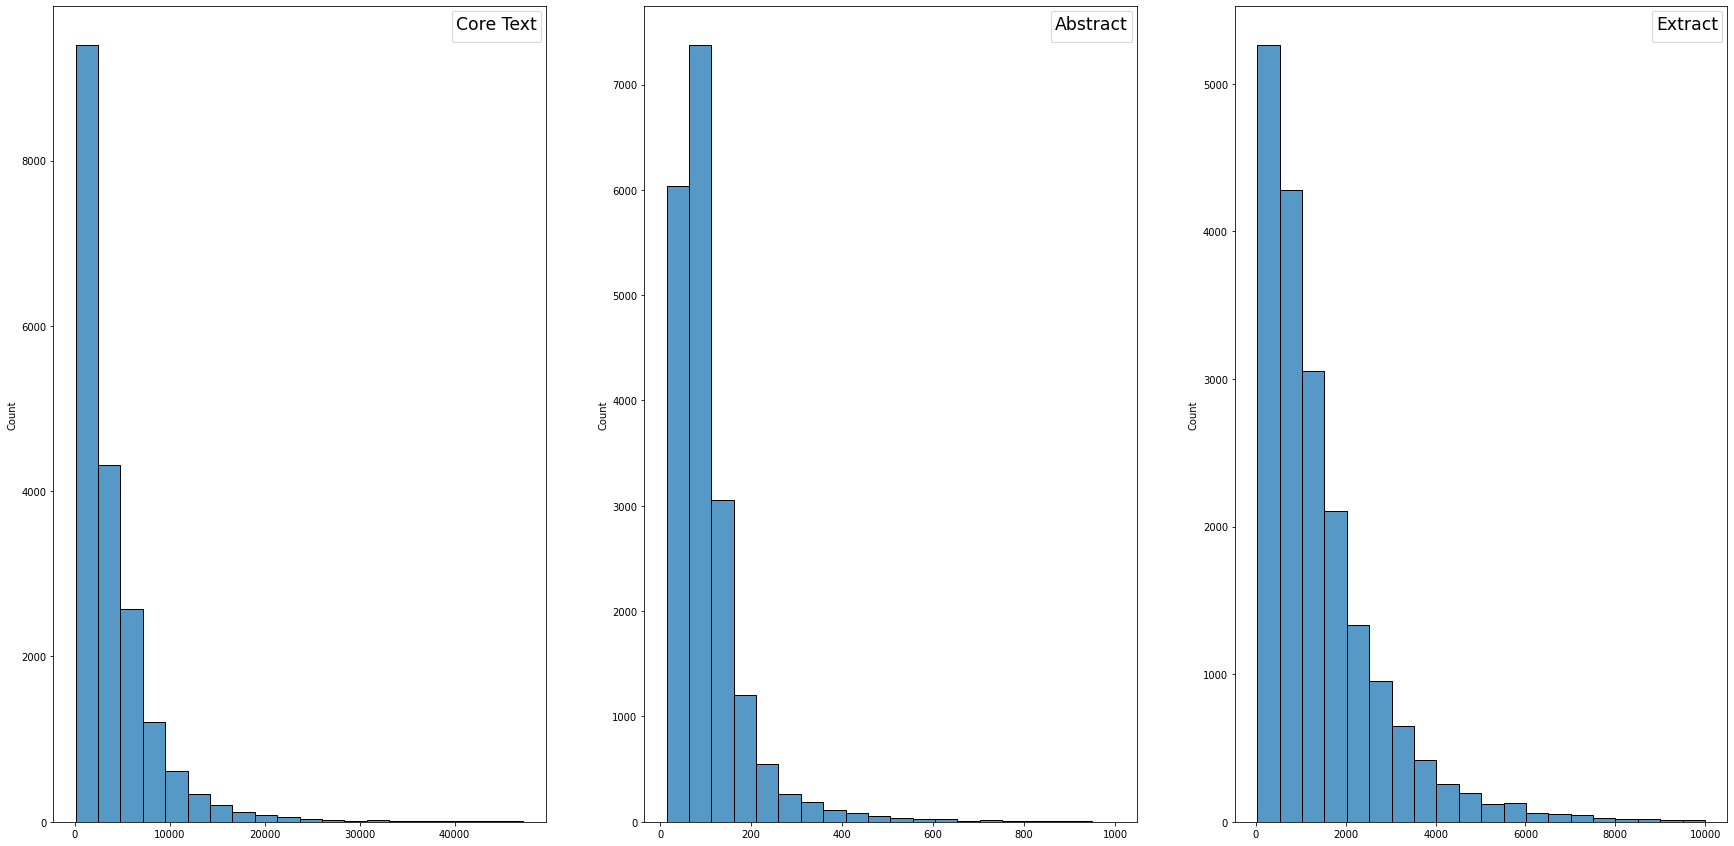

In [3]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols = 3, nrows = 1, figsize=(30,15))

sns.histplot(data['#CharsDocument'].values[data['#CharsDocument'].values < 50000], bins = 20, ax=ax1)
ax1.legend(title = 'Core Text', title_fontsize = 'xx-large')
sns.histplot(data['#CharsAbstract'].values[data['#CharsAbstract'].values < 1000], bins = 20, ax=ax2)
ax2.legend(title = 'Abstract', title_fontsize = 'xx-large')
sns.histplot(data['#CharsExtract'].values[data['#CharsExtract'].values < 10000], bins = 20, ax=ax3)
ax3.legend(title = 'Extract', title_fontsize = 'xx-large')

plt.savefig('Char_Counts_2019.png')

# Word counts

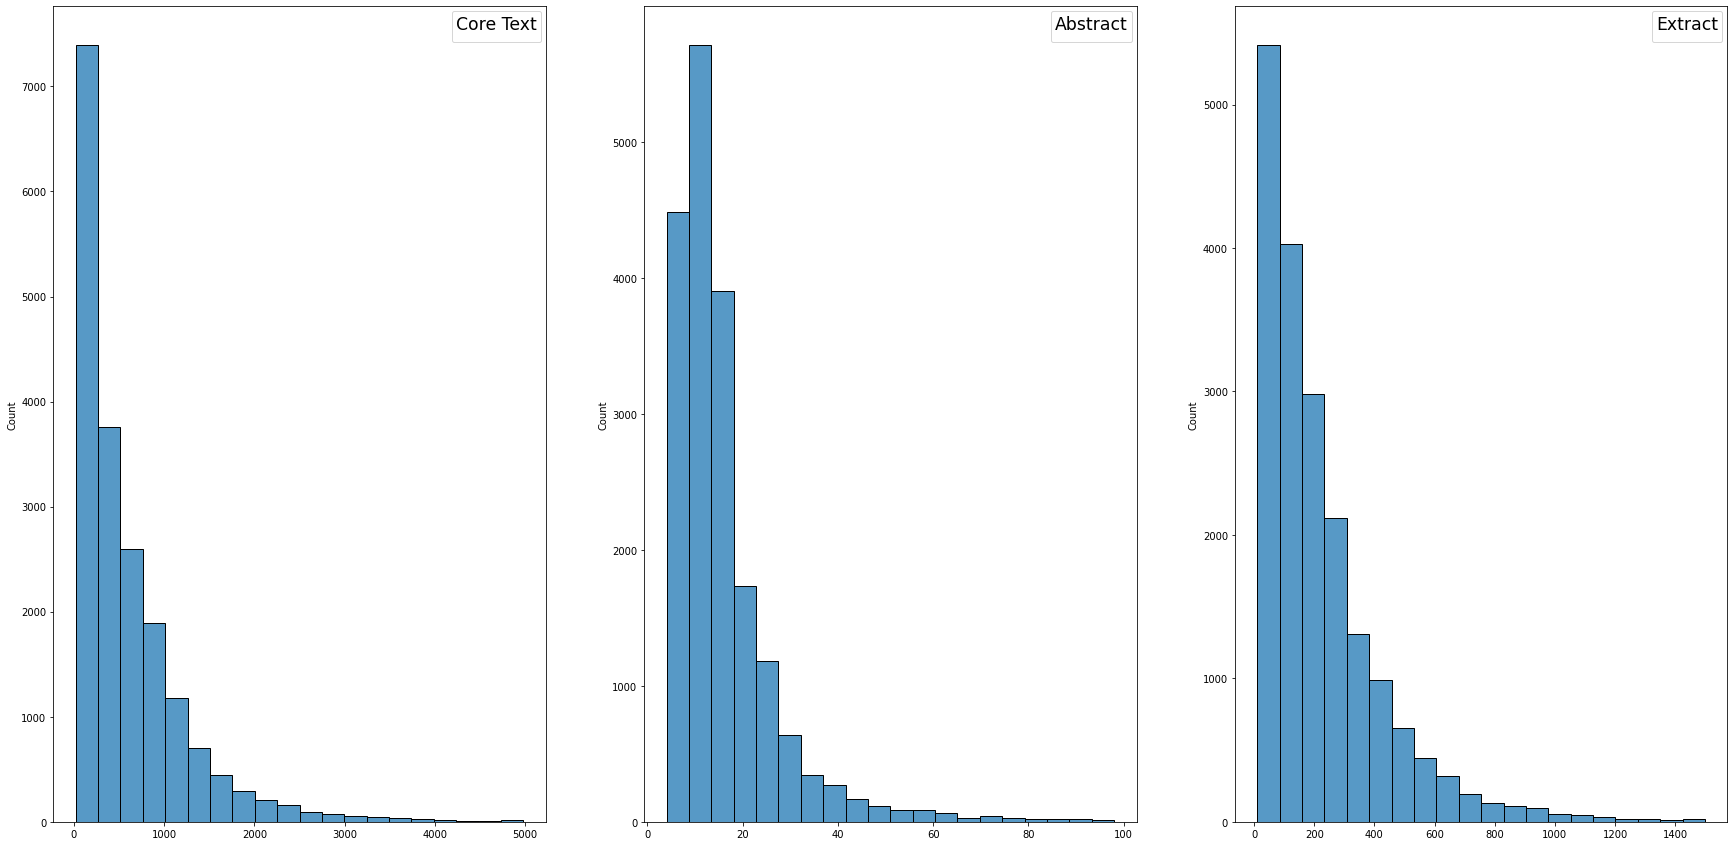

In [4]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols = 3, nrows = 1, figsize=(30,15))

sns.histplot(data['#WordsDocument'].values[data['#WordsDocument'].values < 5000], bins = 20, ax=ax1)
ax1.legend(title = 'Core Text', title_fontsize = 'xx-large')
sns.histplot(data['#WordsAbstract'].values[data['#WordsAbstract'].values < 100], bins = 20, ax=ax2)
ax2.legend(title = 'Abstract', title_fontsize = 'xx-large')
sns.histplot(data['#WordsExtract'].values[data['#WordsExtract'].values < 1500], bins = 20, ax=ax3)
ax3.legend(title = 'Extract', title_fontsize = 'xx-large')

plt.savefig('Word_Counts_2019.png')

# Most common words

## Core texts

In [5]:
text = " ".join(txt for txt in data['Full-Document'].values)
wordcloud = WordCloud(width = 1600, height = 800, collocations = False, background_color = 'white').generate(text)

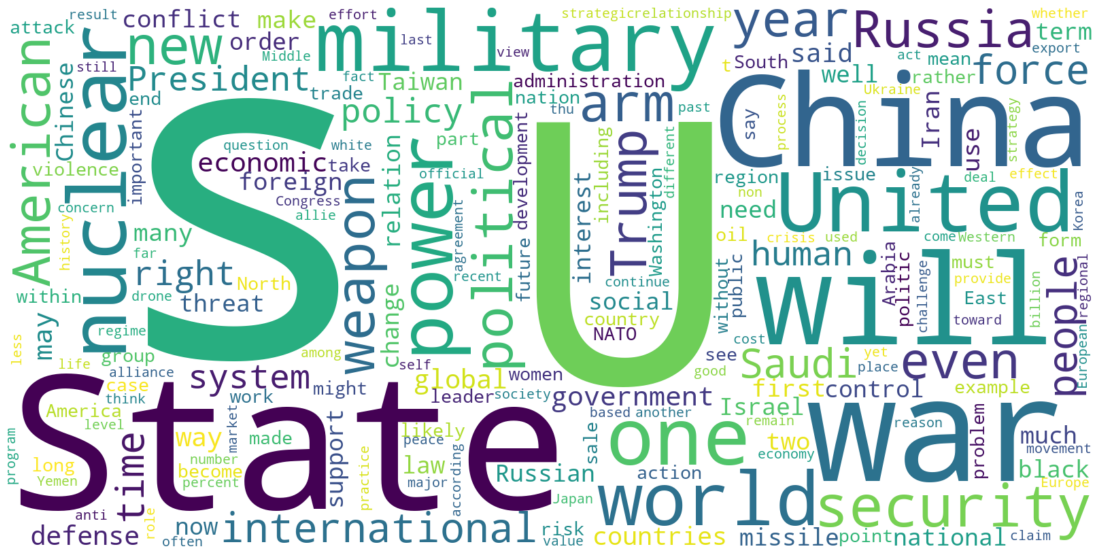

In [6]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('WordCloud_CoreText.png')
plt.show()

## Extracts

In [7]:
text = " ".join(txt for txt in data['Extract'].values)
wordcloud = WordCloud(width = 1600, height = 800, collocations = False, background_color = 'white').generate(text)

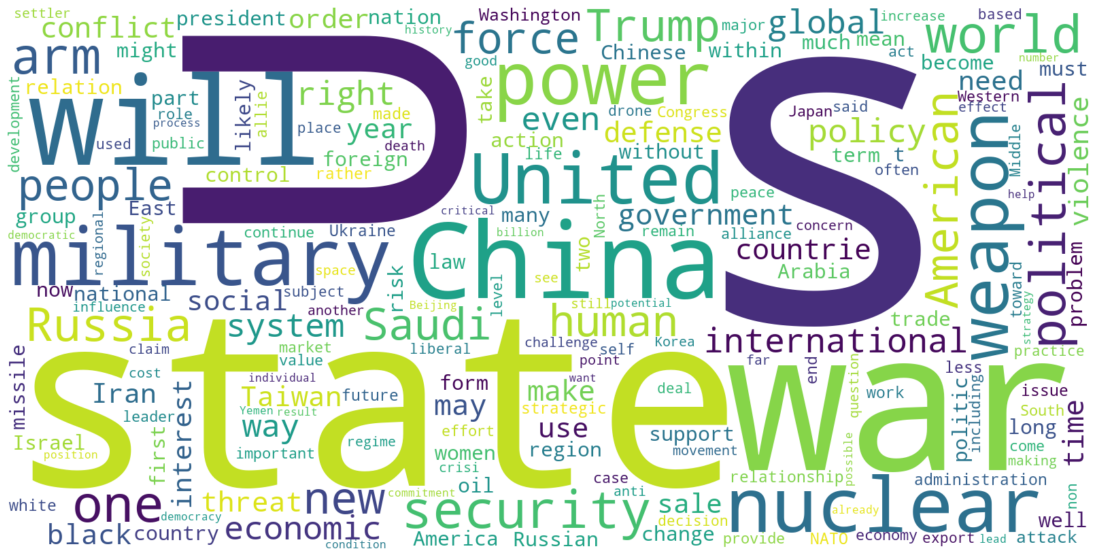

In [8]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('WordCloud_Extracts.png')
plt.show()

##  Abstracts

In [9]:
text = " ".join(txt for txt in data['Abstract'].values)
wordcloud = WordCloud(width = 1600, height = 800, collocations = False, background_color = 'white').generate(text)

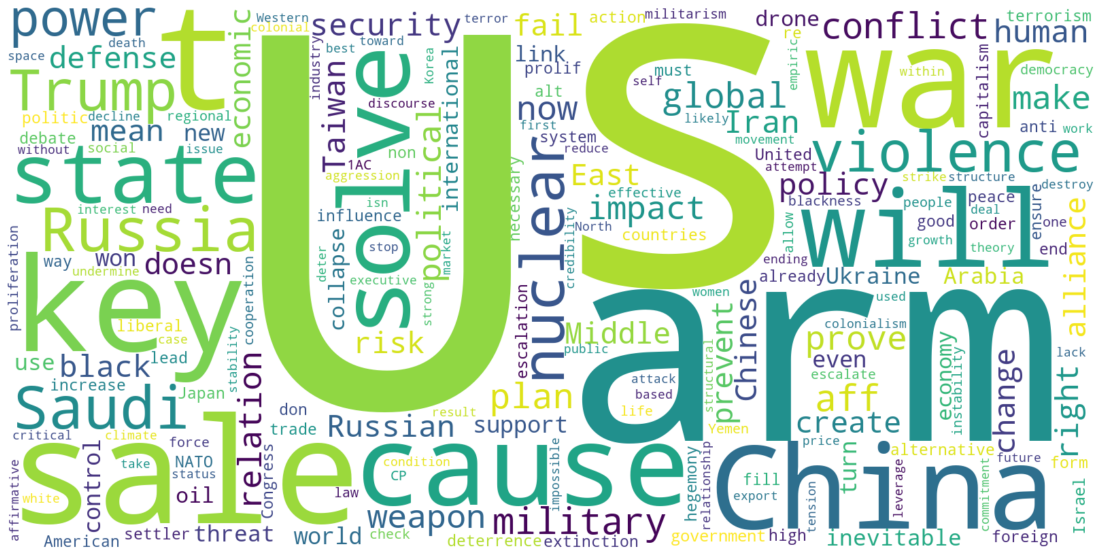

In [10]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('WordCloud_Abstracts.png')
plt.show()

**Sale**, **Key** and **Arm** are more common in abstracts : 
*  'arm' is associated to 'sale'
*  'key' seems to be used to make abstracts shorter

In [11]:
sale_df = data['Abstract'][data['Abstract'].str.contains('sale')].reset_index(drop=True)
for i in range(5):
    print(sale_df[i])
    print()

Oscillations in arms sales policy are exercises in colonial pacification of the periphery that underpin the structural operations of imperial violence and racial categorization

Cutting off arms sales would end the war in Yemen – only America can provide logistical support, and provides diplomatic cover for Saudi operations

Continued arms sales implicitly condone the Khashoggi killing – Trump emboldens the regime

Arms sales are key

American officials are increasingly worried about being exposed to war crimes litigation – Trump’s ramping up sales anyway



In [12]:
key_df = data['Abstract'][data['Abstract'].str.contains('key')].reset_index(drop=True)
for i in range(5):
    print(key_df[i])
    print()

The alt is a reframing of what we understand as a life worth living and an uncompromising commitment to decolonial revolution—embracing death and extinction as a narrative, not biological, phenomenon is the only ethical way to ally with alternate political orders and temporalities—and, it’s key to disrupt your own subconscious bias towards futurity and preserving what you understand as life 

Consequentialism is key to political efficacy—refusing to assume responsibility for their starting point ensures political disaster

Their K of liberalism and modernity is too vague—particularity is key

Contextual, institutional focus and pragmatic humanist praxis are key

Presuming the ontological necessity of antiblackness can’t bring about liberation—grounding praxis in an ontology of contingency is key

